#1. colab 세팅
- 구글 드라이브 마운트
- GPU 할당

In [ ]:
# colab 마운트
from google.colab import drive
drive.mount('/content/drive')

# 2. Dataset 준비

### Dataset 폴더 구성
```
Dataset folder  
├── data.yaml  
├── train  
│   ├── images  
│   └── labels  
├── test  
│   ├── images  
│   └── labels  
└── valid  
    ├── images  
    └── labels  
```

- images folder: 이미지 파일이 들어가있는 폴더
`ex) a.jpg`

- labels: 이미지 파일에서 target object에 대한 정보가 담긴 텍스트 파일
`ex) a.txt`

  - 안에 담긴 정보는 총 5개
`n x y h w`
    - n: class label
    - x: target object에 대한 x좌표
    - y: target object에 대한 y좌표
    - h: height
    - w: width

**images 폴더와 labels폴더에서 확장자에 대한 파일명이 같아야 올바르게 매핑되어 학습이 가능.
(ex: a.jpg에 대한 정보는 a.txt에 담겨 있어야 함.)**

--- 

### data.yaml 파일 내용 수정하기
```
train: train images path (ex: ../train/images)
val: val images path (ex: ../valid/images)

nc: 1 (target object number)
names: ['smoke'] (target object에 대한 label)
```


## 3. YOLO v5 환경 구축하기

### 3-1. yolo-v5 클론하기

아래 그림처럼 yolov5 폴더가 추가되어야한다.
![1](https://user-images.githubusercontent.com/63298243/179417115-7d5413e4-d454-4bda-ad6b-5e75c8e03732.png)

추가되지 않았다면 아래 그림과 같은 새로고침 버튼을 눌러보자.

![2](https://user-images.githubusercontent.com/63298243/179417118-2e9b2e6b-1993-40af-9104-72224fe3da21.png)

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12719, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 12719 (delta 86), reused 125 (delta 73), pack-reused 12575
Receiving objects: 100% (12719/12719), 12.39 MiB | 17.45 MiB/s, done.
Resolving deltas: 100% (8742/8742), done.


### 3-2. yolo-v5에서 제시하는 모델 버전으로 세팅하기

> %cd path

여기서 path는 yolov5가 설치된 파일경로로 지정해야 한다.

경로 복사 방법은 다음 그림과 같다.

![3](https://user-images.githubusercontent.com/63298243/179417119-cd909260-52c8-4ebe-945c-fb9f15cec585.png)

`requirements.txt`에는 yolo-v5가 원활하게 돌아가는 환경을 설정할 수 있는 파일이다.  
해당 코드를 실행시켜서 원하는 환경으로 맞춰준다.

In [2]:
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 18.6 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 21.0 MB 1.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0+cu113
    Uninstalling torchvision-0.13.0+cu113:
      Successfully uninstalled torchvision-0.13.0+cu113
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires

## 3-3. 모델 훈련시키기


> !python train.py --img [size] --batch [batch_size] --epoch [epoch_size] --data [data.yaml file path] --cfg [yolov5s.yaml file path] --weights [.pt file path] --name [save train file name]

코드를 실행시키고 나면 `yolov5/runs/train/` 폴더안에 `--name`에서 지정한 이름의 폴더가 생성된다.

In [20]:
!python train.py --img 460 --batch 40 --epochs 50 --data /content/drive/MyDrive/YOLO/Dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name result

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/YOLO/Dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=40, imgsz=460, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

### 3-4. 모델을 zip 파일로 저장 
해당 파일만 있으면 나중에 라즈베리 파이와 같은 타 환경에서도 본인이 만든 모델을 바로 사용가능

In [7]:
!zip -r train_result.zip /content/yolov5/runs/train/result

  adding: content/yolov5/runs/train/result/ (stored 0%)
  adding: content/yolov5/runs/train/result/train_batch0.jpg (deflated 2%)
  adding: content/yolov5/runs/train/result/train_batch1.jpg (deflated 3%)
  adding: content/yolov5/runs/train/result/R_curve.png (deflated 22%)
  adding: content/yolov5/runs/train/result/val_batch0_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/result/val_batch0_labels.jpg (deflated 7%)
  adding: content/yolov5/runs/train/result/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/result/confusion_matrix.png (deflated 41%)
  adding: content/yolov5/runs/train/result/labels_correlogram.jpg (deflated 34%)
  adding: content/yolov5/runs/train/result/opt.yaml (deflated 42%)
  adding: content/yolov5/runs/train/result/P_curve.png (deflated 20%)
  adding: content/yolov5/runs/train/result/val_batch1_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/result/events.out.tfevents.1658075848.2df2ae3b12ef.2700.0 (deflated 43%)
  adding: content/yo

## 3-5. 모델 성능 검증 평가

> !python val.py --data [data.yaml file path] --weights [yolov5/runs/train/train_result/weights/best.pt]

코드를 실행시키고 나면 `yolov5/val/exp` 폴더안에 성능 검증 평가를 시각화한 다양한 그래프가 생성된다.

- F1 검증
- Precision(정밀도)
- Recall(재현율)
- confusion matrix(오차행렬/AI 내에서는 모델 성능 평가 지표라고 불림)
- val 데이터 detection 결과


In [21]:
!python val.py --data "/content/drive/MyDrive/YOLO/Dataset/data.yaml" --weights "/content/yolov5/runs/train/result/weights/best.pt"

val: data=/content/drive/MyDrive/YOLO/Dataset/data.yaml, weights=['/content/yolov5/runs/train/result2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/drive/MyDrive/YOLO/Dataset/valid/labels.cache' images and labels... 147 found, 0 missing, 0 empty, 0 corrupt: 100% 147/147 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 5/5 [00:04<00:00,  1.05it/s]
                 all        147        147      0.899      0.904      0.918      0.485
Speed: 0.8ms pre-process, 8.1ms inference, 3.0ms NMS 

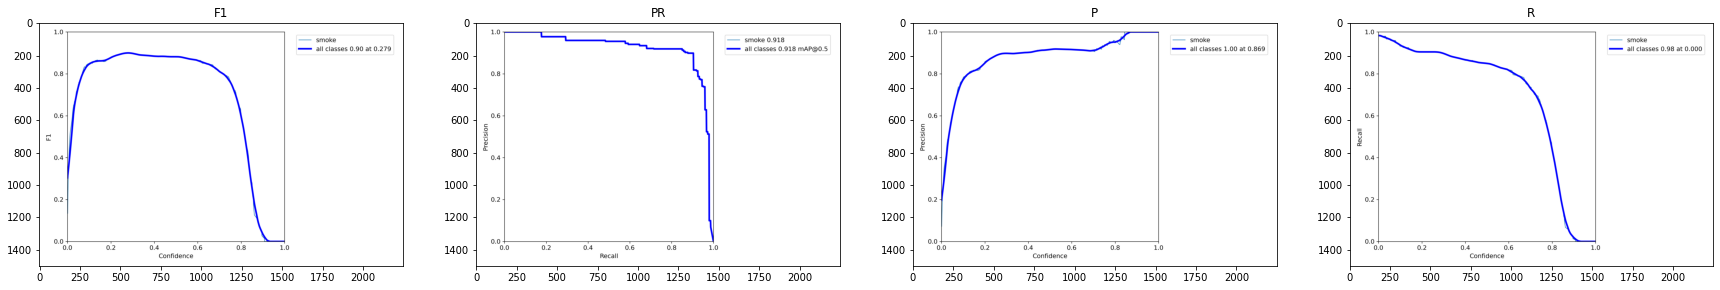

In [22]:
import matplotlib.pyplot as plt
img_path = "/content/yolov5/runs/val/exp/"
F1 = plt.imread(img_path+'F1_curve.png')
PR = plt.imread(img_path+'PR_curve.png')
P = plt.imread(img_path+'P_curve.png')
R = plt.imread(img_path+'R_curve.png')
confusion_matrix = plt.imread(img_path+'confusion_matrix.png')

# 검증데이터 시각화
val_batch0_labels = plt.imread(img_path+'val_batch0_labels.jpg')
val_batch0_pred = plt.imread(img_path+'val_batch0_pred.jpg')
val_batch1_labels = plt.imread(img_path+'val_batch1_labels.jpg')
val_batch1_pred = plt.imread(img_path+'val_batch1_pred.jpg')
val_batch2_labels = plt.imread(img_path+'val_batch2_labels.jpg')
val_batch2_pred = plt.imread(img_path+'val_batch2_pred.jpg')

plt.figure(figsize=(30, 10))
plt.subplot(1,4,1)
plt.title('F1')
plt.imshow(F1)

plt.subplot(1,4,2)
plt.title('PR')
plt.imshow(PR)

plt.subplot(1,4,3)
plt.title('P')
plt.imshow(P)

plt.subplot(1,4,4)
plt.title('R')
plt.imshow(R)

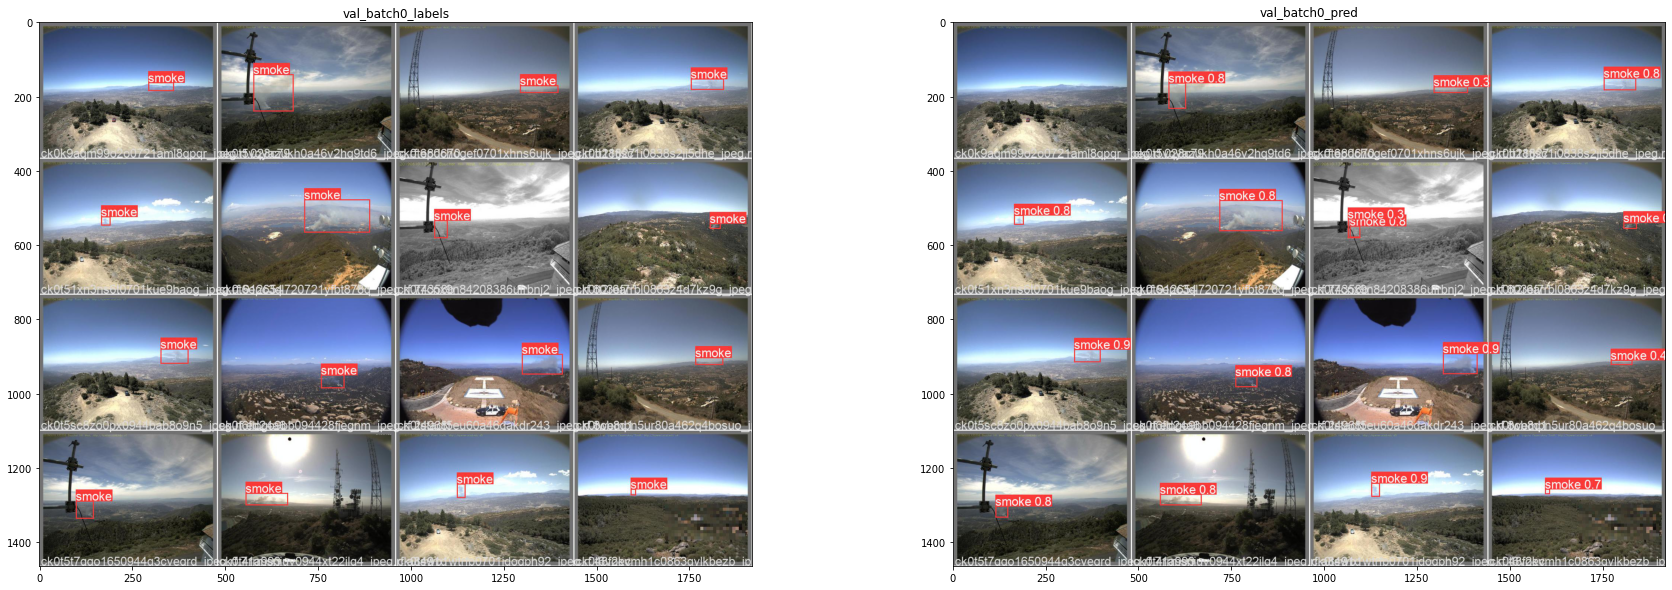

In [23]:
plt.figure(figsize=(30, 10))
plt.subplot(1,2,1)
plt.title('val_batch0_labels')
plt.imshow(val_batch0_labels)

plt.subplot(1,2,2)
plt.title('val_batch0_pred')
plt.imshow(val_batch0_pred)

## 3-6. 실제로 적용해보기
```python
!python detect.py --source 0  # webcam
                           img.jpg  # image
                           vid.mp4  # video
                           path/  # directory
                           path/*.jpg  # glob
```

코드를 실행시키고 나면 `yolov5/runs/detect/exp` 에서 detection한 결과를 보여준다.

In [24]:
!python detect.py --weights "/content/yolov5/runs/train/result/weights/best.pt" --source "/content/drive/MyDrive/YOLO/Dataset/test/images/ck0kcoc8ik6ni0848clxs0vif_jpeg.rf.8b4629777ffe1d349cc970ee8af59eac.jpg"

detect: weights=['/content/yolov5/runs/train/result2/weights/best.pt'], source=/content/drive/MyDrive/YOLO/Dataset/test/images/ck0kcoc8ik6ni0848clxs0vif_jpeg.rf.8b4629777ffe1d349cc970ee8af59eac.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/YOLO/Dataset/test/images/ck0kcoc8ik6ni0848clxs0vif_jpeg.rf.8b4629777ffe1d349cc970ee8af59eac.jpg: 480x640 1 smoke, Done. (0.011s)
Speed: 0.5ms pre-process, 11.0ms inference, 1.2ms NMS per image at shape (1, 

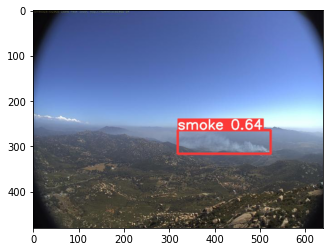

In [25]:
detect = plt.imread('/content/yolov5/runs/detect/exp/ck0kcoc8ik6ni0848clxs0vif_jpeg.rf.8b4629777ffe1d349cc970ee8af59eac.jpg')
plt.imshow(detect)